In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
%matplotlib inline
# %matplotlib qt5
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [10]:
CustomerData=pd.read_csv('data/RFM_Classify.csv')

CustomerData.head(3).T

,0,1,2
CUSTCODE,00000000001,00000000002,00000000003
CUSTNAME,华普超市有限公司,北京恒昌吉商贸有限责任公司,北京丰文轩商贸有限公司
DT_Rf,2007/12/8,2007/12/3,2007/12/1
DT_Rq1,2007/12/8,2007/12/19,2007/12/12
DT_Rq2,2007/12/16,2007/12/26,2007/12/26
DT_Rq3,2007/12/16,2008/1/11,2008/1/6
DT_Rr,2007/12/16,2008/1/21,2008/1/21
Rf,203,208,210
Rq1,203,192,199
Rq2,195,185,185


In [11]:
factor_cols=["Factor1","Factor2","Factor3"]
rfm_cols=["Recency","Frequency","Monetary"]

factorData=CustomerData[factor_cols]
rfmData=CustomerData[rfm_cols]

In [12]:
factorData

,Factor1,Factor2,Factor3
0,-0.083301,-0.950314,-0.080848
1,-0.604604,2.946764,0.527095
2,-0.540515,1.984889,4.105172
3,-0.382294,-0.404900,-0.198605
4,-0.699839,0.911472,1.463128
...,...,...,...
5350,0.095660,-0.962888,-0.162319
5351,-0.990445,-0.750649,0.608385
5352,-0.120499,-1.162972,0.645861
5353,-0.869783,-0.682763,1.611973


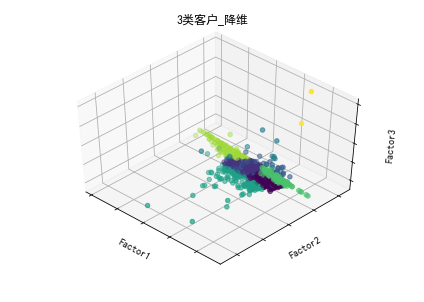

In [13]:
est_factor = KMeans(n_clusters=8)
est_factor.fit(factorData)
labels_factor=est_factor.labels_
fig = plt.figure('聚类分析')
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(factorData.iloc[:, 0], factorData.iloc[:, 1], factorData.iloc[:, 2],c=labels_factor.astype(np.float))
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel(factor_cols[0])
ax.set_ylabel(factor_cols[1])
ax.set_zlabel(factor_cols[2])
ax.set_title("3类客户_降维")
ax.dist = 12
plt.show()

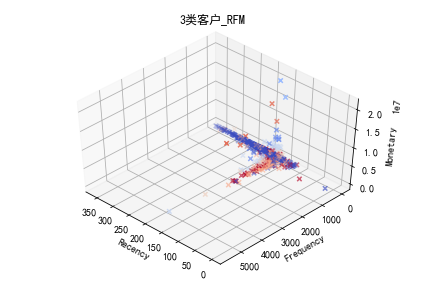

In [19]:
est_rfm = KMeans(n_clusters=8)
est_rfm.fit(rfmData)
labels_rfm=est_rfm.labels_
fig = plt.figure('RFM聚类分析')
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(rfmData.iloc[:, 0], rfmData.iloc[:, 1], rfmData.iloc[:, 2],c=labels_rfm.astype(np.float),s=20,marker='x',cmap='coolwarm')

ax.set_xlabel(rfm_cols[0])
ax.set_ylabel(rfm_cols[1])
ax.set_zlabel(rfm_cols[2])
ax.set_title("3类客户_RFM")
ax.dist = 12
plt.show()